# **MAIN**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

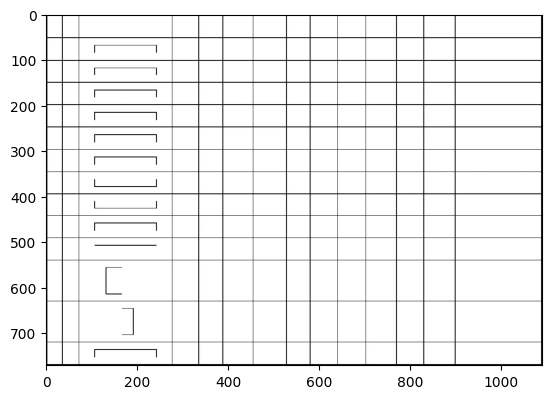

In [ ]:
image = cv2.imread('page.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = 'gray')

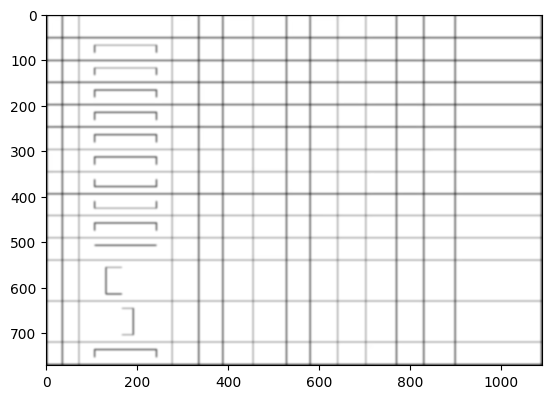

In [ ]:
blur_img = cv2.GaussianBlur(gray_img, (11,11), 0)
plt.imshow(blur_img, cmap = 'gray')

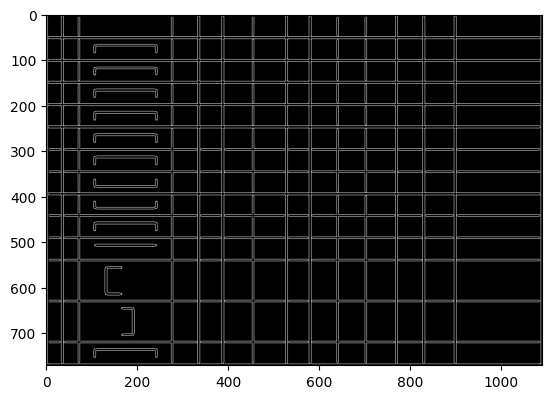

In [ ]:
canny_img = cv2.Canny(blur_img,30,105,3)
plt.imshow(canny_img, cmap='gray')

In [ ]:
canny_img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0]], dtype=uint8)

In [ ]:
count = 0
pos = []
pos1 = 0
for i in range(canny_img.shape[1]):
  if count == 1 and i > pos1 + 10:
    count += 1

  if canny_img[25,i] == 255:
    count += 1

    if count == 1:
      if i < 10:
        count = 0
      else:
        pos1 = i

    elif count == 3:
      pos.append(i + 1)

    elif count == 4:
      pos.append(i + 1)

    elif count == 5:
      pos.append(i + 1)
      break

if pos[1] - pos[0] < 10:
  pos.pop(0)
elif pos[2] - pos[1] < 10:
  pos.pop(2)
pos

[75, 276]

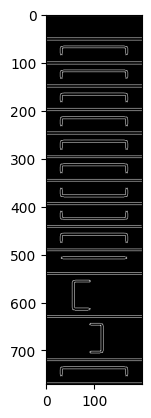

In [ ]:
canny_img_cropped = canny_img[:,pos[0]:pos[1]-1]
plt.imshow(canny_img_cropped, cmap='gray')

In [ ]:
img_cropped = gray_img[:,pos[0]:pos[1]-1]
img_cropped

array([[  1,   0,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   1,   1,   1],
       [  0,   2,   2, ...,   2,   2,   2],
       ...,
       [250, 248, 248, ..., 249, 249, 249],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

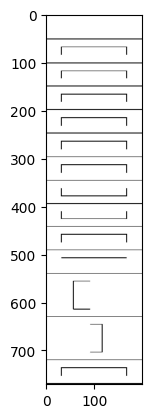

In [ ]:
plt.imshow(img_cropped, cmap='gray')

In [ ]:
blur_img_cropped = blur_img[:,pos[0]:pos[1]-1]
blur_img_cropped

array([[ 49,  51,  51, ...,  51,  50,  49],
       [ 62,  64,  65, ...,  65,  64,  62],
       [ 97, 101, 102, ..., 102, 100,  96],
       ...,
       [150, 156, 159, ..., 160, 157, 151],
       [117, 122, 125, ..., 125, 123, 118],
       [104, 109, 111, ..., 111, 109, 105]], dtype=uint8)

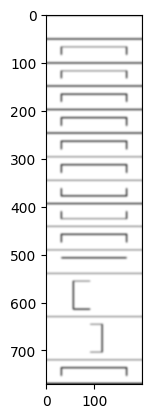

In [ ]:
plt.imshow(blur_img_cropped, cmap='gray')

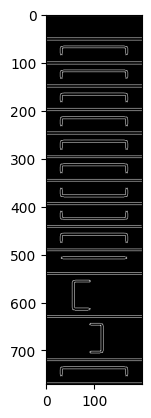

In [ ]:
plt.imshow(canny_img_cropped, cmap='gray')

In [ ]:
img_crop = pd.DataFrame(canny_img)

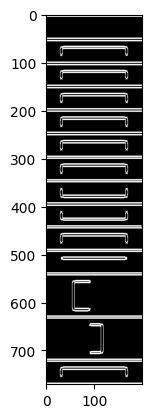

In [ ]:
dilated_img = cv2.dilate(canny_img_cropped, (1,1), iterations = 2)
plt.imshow(dilated_img, cmap = 'gray')

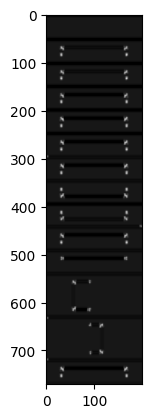

In [ ]:
corner_img = cv2.cornerHarris(dilated_img, 5, 3, 0.02)
plt.imshow(corner_img, cmap = 'gray')

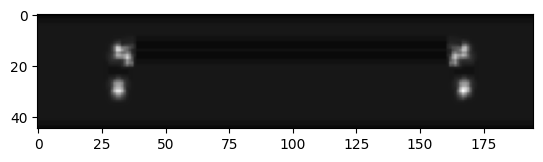

In [ ]:
plt.imshow(corner_img[55:100,0:195], cmap = 'gray')

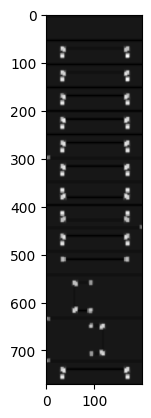

In [ ]:
c= cv2.dilate(corner_img, np.ones((2,2)), iterations = 4)
plt.imshow(c, cmap = 'gray')

In [ ]:
min = c.min()
max = c.max()

In [ ]:
a = (c - min) / (max - min)

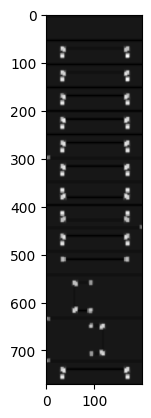

In [ ]:
plt.imshow(a, cmap = 'gray')

In [ ]:
b = a[55:100,0:195]

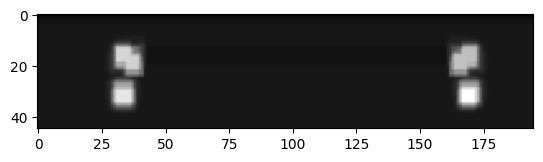

In [ ]:
plt.imshow(b, cmap = 'gray')

In [ ]:
a_new = np.around(1 / (1 + np.exp(-(a-0.55))))

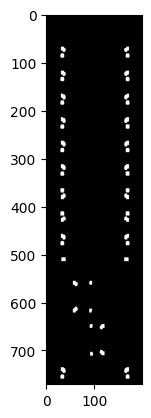

In [ ]:
plt.imshow(a_new, cmap = 'gray')

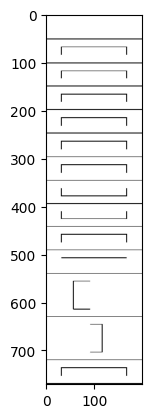

In [ ]:
filtered_img = img_cropped
plt.imshow(filtered_img, cmap = 'gray')

In [ ]:
min2 = filtered_img.min()
max2 = filtered_img.max()
filtered_img = (filtered_img - min2) / (max2 - min2)

In [ ]:
filtered_img = np.around(filtered_img)

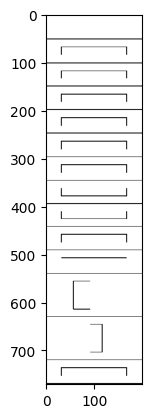

In [ ]:
plt.imshow(filtered_img, cmap = 'gray')

In [ ]:
filtered_img_2 = np.copy(filtered_img)
filtered_img_2[filtered_img == 1] = 0
filtered_img_2[filtered_img == 0] = 1

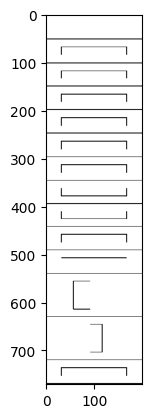

In [ ]:
plt.imshow(filtered_img, cmap = 'gray')

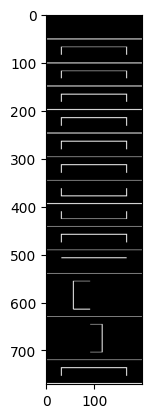

In [ ]:
plt.imshow(filtered_img_2, cmap = 'gray')

In [ ]:
b_new = np.copy(a_new[55:100,0:195])

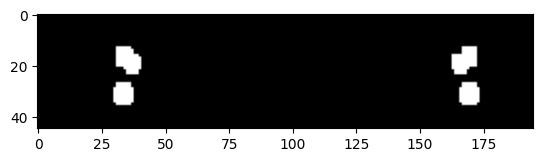

In [ ]:
plt.imshow(b_new, cmap = 'gray')

In [ ]:
d_new = np.copy(filtered_img_2[55:100,0:195])

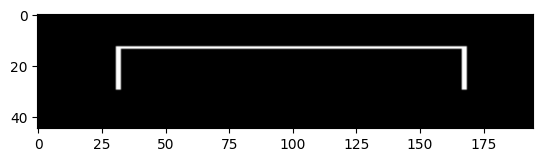

In [ ]:
plt.imshow(d_new, cmap = 'gray')

In [ ]:
e_new = d_new.copy()
e_new[20:22,:] = 0

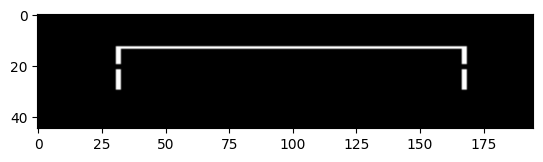

In [ ]:
plt.imshow(e_new, cmap = 'gray')

In [ ]:
import sys
print(sys.getrecursionlimit())

1000


In [ ]:
sys.setrecursionlimit(25000)

In [ ]:
def recurse(arr,x,y,dir,poss):
  dirs = [[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,1],[-1,-1],[-1,1]]
  poss.append([x,y])
  arr[x][y] = 0
  try:
    dirs.remove(dir)
  except:
    pass
  for i in dirs:
    x_2 = x + i[0]
    y_2 = y + i[1]
    if(x_2>= arr.shape[0] or y_2>= arr.shape[1]):
      continue
    dir2 = [-i[0],-i[1]]
    if (arr[x_2,y_2] == 1):
      arr,poss = recurse(arr,x_2,y_2,dir2,poss.copy())
  return arr, poss.copy()

def recurse2(arr,x,y,dir,poss):
  dirs = [[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,1],[-1,-1],[-1,1]]
  poss.append([x,y])
  arr[x][y] = 0
  try:
    dirs.remove(dir)
  except:
    pass
  for i in dirs:
    x_2 = x + i[0]
    y_2 = y + i[1]
    if(x_2>= arr.shape[0] or y_2>= arr.shape[1] or [x_2,y_2] not in poss):
      continue
    dir2 = [-i[0],-i[1]]
    if (arr[x_2,y_2] == 1):
      arr = recurse2(arr,x_2,y_2,dir2,poss)
  return arr

def check_double(arr,positions):
  count = 0
  # fig_t = plt.figure()
  arr2 = np.copy(arr)
  for pos in positions:
    x = pos[0]
    y = pos[1]
    if arr2[x][y] == 1:
      arr2 = recurse2(arr2,x,y,[0,0],positions)
      # plt.imshow(arr2, cmap='gray')
      count += 1
  return (count - 1)


def count(arr, arr_or):
  # fig_t = plt.figure()
  # plt.imshow(arr, cmap='gray')
  # fig_t = plt.figure()
  # plt.imshow(arr_or, cmap='gray')

  arr_2 = np.copy(arr)
  arr_or_2 = np.copy(arr_or)
  count = 0
  for i in range(arr_2.shape[0]):
    for j in range(arr_2.shape[1]):
      i_2 = i
      j_2 = j
      posses=[]
      if arr_2[i_2][j_2] == 1:
        count += 1
        arr_2,posses = recurse(arr_2,i_2,j_2,[0,0],[])
        # fig_t = plt.figure()
        # plt.imshow(arr_2, cmap='gray')
        posses=posses.copy()
        count += check_double(arr_or_2,posses)

  # fig_t = plt.figure()
  # plt.imshow(arr_2, cmap='gray')
  return count

In [ ]:
count(b_new,d_new)

4

In [ ]:
canny_img_cropped = np.around(canny_img_cropped/255)

In [ ]:
canny_img_cropped.shape

(771, 200)

In [ ]:
canny_img_cropped.max()

1.0

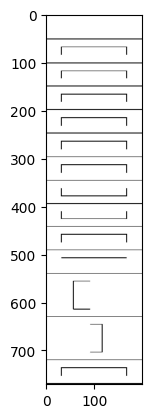

In [ ]:
plt.imshow(img_cropped,cmap='gray')

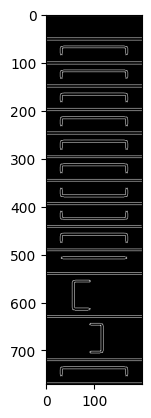

In [ ]:
plt.imshow(canny_img_cropped,cmap='gray')

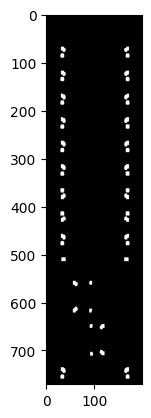

In [ ]:
plt.imshow(a_new,cmap='gray')

Number of Edges =  -1 Corners =  0 Bends =  -2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  1 Corners =  2 Bends =  0
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2
Number of Edges =  3 Corners =  4 Bends =  2


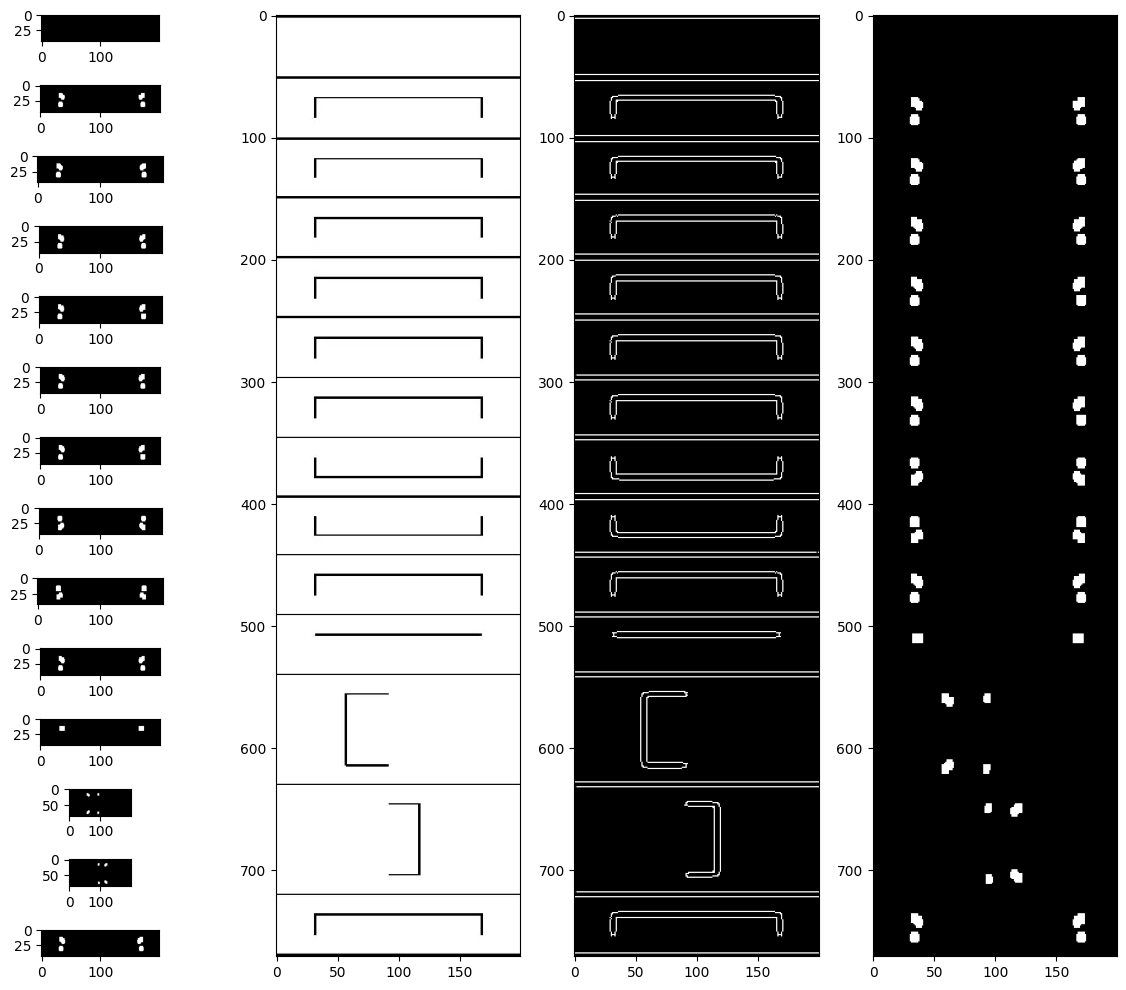

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)

plt.subplot2grid(shape=(14, 4), loc=(0, 1), rowspan=14).imshow(img_cropped,cmap='gray')
plt.subplot2grid(shape=(14, 4), loc=(0, 2), rowspan=14).imshow(canny_img_cropped,cmap='gray')
plt.subplot2grid(shape=(14, 4), loc=(0, 3), rowspan=14).imshow(a_new,cmap='gray')
imgs = 0

last_i = 0
for i in range(canny_img_cropped.shape[0]):
  if canny_img_cropped[i][10] == 1:
    if i > last_i + 20:
      #-1 meaning edge not found
      corners = count(a_new[last_i:i][:], filtered_img_2[last_i:i][:])
      print("Number of Edges = ",corners-1,"Corners = ",corners,"Bends = ",corners-2)
      plt.subplot2grid(shape=(14, 4), loc=(imgs, 0), rowspan=1).imshow(a_new[last_i+1:i][:],cmap='gray')
      imgs += 1
      last_i = i
    else:
      last_i = i

plt.tight_layout()

# display plot
plt.show()

**Nearby Point Demonstration**

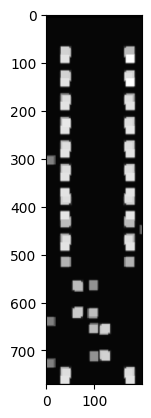

In [ ]:
c= cv2.dilate(corner_img, np.ones((2,2)), iterations = 15)
plt.imshow(c, cmap = 'gray')

In [ ]:
min = c.min()
max = c.max()

In [ ]:
a = (c - min) / (max - min)

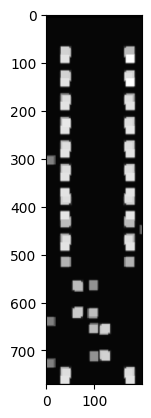

In [ ]:
plt.imshow(a, cmap = 'gray')

In [ ]:
b = a[55:100,0:195]

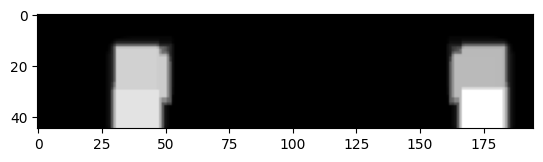

In [ ]:
plt.imshow(b, cmap = 'gray')

In [ ]:
a_new = np.around(1 / (1 + np.exp(-(a-0.55))))

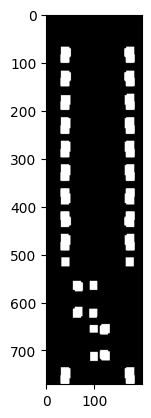

In [ ]:
plt.imshow(a_new, cmap = 'gray')

In [ ]:
b_new = np.copy(a_new[55:100,0:195])

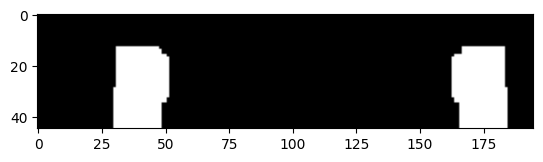

In [ ]:
plt.imshow(b_new, cmap = 'gray')

In [ ]:
d_new = np.copy(filtered_img_2[55:100,0:195])

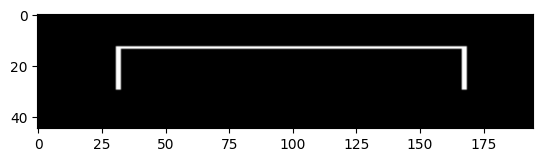

In [ ]:
plt.imshow(d_new, cmap = 'gray')

In [ ]:
e_new = d_new.copy()
e_new[20:22,:] = 0

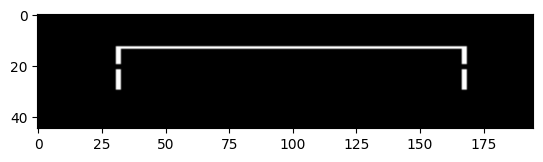

In [ ]:
plt.imshow(e_new, cmap = 'gray')

In [ ]:
count(b_new,d_new)

2

In [ ]:
count(b_new,e_new)

4

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


['~', '0', '0', '250', '437', '0']


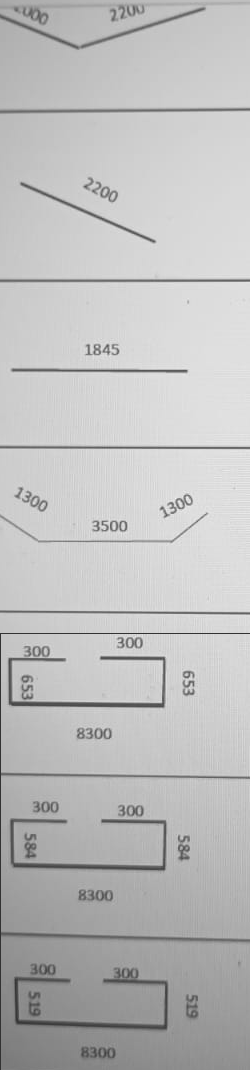

In [ ]:
import pytesseract
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/WhatsApp Image 2023-12-23 at 00.02.46.jpeg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[350:1420,250:500]

imgH, imgW = img.shape

#Detecting Characters
boxes = pytesseract.image_to_boxes(img)

for box in boxes.splitlines():
    box = box.split(' ')
    print(box)
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    name = box[0]
    cv2.rectangle(img, (x, imgH-y), (w, imgH-h), (50,50,255), 1)
    cv2.putText(img, name, (x, imgH-y+25), cv2.FONT_HERSHEY_PLAIN, 1, (50,50,255), 2)

cv2_imshow(img)
key = cv2.waitKey(0)

In [ ]:
img.shape

(1000, 250)

# **End**

In [ ]:
(cnt, heirarchy) = cv2.findContours(dilated_img[60:90].copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb_img = cv2.cvtColor(img_cropped[60:90], cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb_img, cnt, -1, (0,255,0),2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

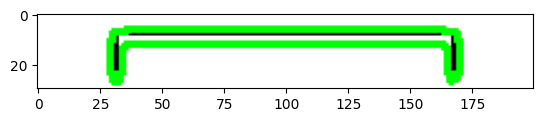

In [ ]:
plt.imshow(rgb_img)

In [ ]:
#counting object
print('Cells in the image', len(cnt))

Cells in the image 1


# **PART 2**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

TypeError: Image data of dtype object cannot be converted to float

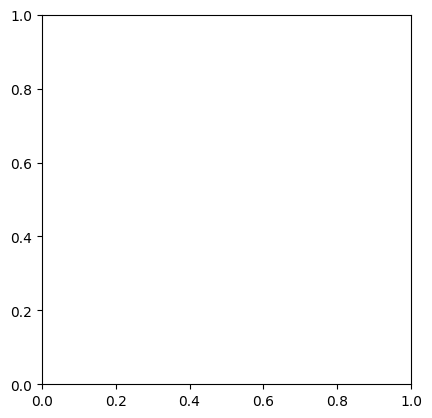

In [ ]:
image = cv2.imread('for_canny.png')
plt.imshow(image)

In [ ]:
image = cv2.imread('for_canny.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

In [ ]:
blur = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(blur, cmap = 'gray')

In [ ]:
canny = cv2.Canny(blur,30,105,3)
plt.imshow(canny, cmap='gray')

In [ ]:
canny

In [ ]:
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated, cmap = 'gray')

In [ ]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0),2)

In [ ]:
plt.imshow(rgb)

In [ ]:
#counting object
print('Cells in the image', len(cnt))

# **PDF TO IMG**

In [ ]:
import fitz

In [ ]:
doc = fitz.open("BBS.pdf")
page = doc[0]
paths = page.get_drawings()

outpddf = fitz.open()
outpage = outpdf.new_page(width = page.rect.width, height = page.rect.height)
shape = outpage.new_shape()

for path in paths:

  for item in path["items"]:

    if item[0] == "re" :
      shape.draw_rect(item[1])
    elif item[0] == "qu" :
      shape.draw_quad(item[1])
    elif item[0] == "c" :
      shape.draw_bezier(item[1], item[2],)
    else:
      raise ValueError ("unhandled drawing", item)

  shape.finish()

shape.commit()
outpdf.save("drawings-page-2.pdf")